<a href="https://colab.research.google.com/github/deathstar1/Exploration/blob/main/LSTM_GRU_Conv_SarcasmDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf 
import tensorflow_datasets  as tfds
imdb  , info =  tfds.load('imdb_reviews' , with_info =True ,  as_supervised = True)

In [48]:
import numpy as np 
train_data , test_data = imdb['train'] , imdb['test']

train_sentences =[]
train_labels = []
test_sentences = []
test_labels = []

for s,l  in train_data:
  train_sentences.append(str(s.numpy()))
  train_labels.append(l.numpy())

print(train_sentences[0])
print(train_labels[0])

for s,l  in test_data:
  test_sentences.append(str(s.numpy()))
  test_labels.append(l.numpy())

print(test_sentences[0])
print(test_labels[0])
train_labels_final = np.array(train_labels)
test_labels_final = np.array(test_labels)
print(train_labels_final)
print(test_labels_final)

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
0
b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of th

In [62]:
vocab_size =10000
oov_token = '<OOV>'
max_length = 120
trunc_type = 'post'
embedding_dim = 16

from tensorflow.keras.preprocessing.text  import Tokenizer 
from tensorflow.keras.preprocessing.sequence  import pad_sequences 

tokenizer = Tokenizer(num_words= vocab_size ,  oov_token=oov_token)
print(train_sentences)
tokenizer.fit_on_texts(train_sentences)
word_index =  tokenizer.word_index
sequences  =  tokenizer.texts_to_sequences(train_sentences)
padded =  pad_sequences(sequences=sequences,maxlen=max_length, truncating= trunc_type)
testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [63]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(train_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [64]:
model =  tf.keras.Sequential([tf.keras.layers.Embedding(input_dim= vocab_size ,  output_dim= embedding_dim , input_length= max_length  ),
                              tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
                              tf.keras.layers.Dense(6, activation='relu'),
                              tf.keras.layers.Dense(1 , activation='sigmoid')])

model.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [65]:
num_epochs = 10 
history =  model.fit(padded , train_labels_final ,  epochs= num_epochs ,  validation_data=  (testing_padded ,  test_labels_final ))

Epoch 1/10
782/782 [==============================] - 17s 22ms/step - loss: 0.5080 - accuracy: 0.7240 - val_loss: 0.3689 - val_accuracy: 0.8402
Epoch 2/10
782/782 [==============================] - 16s 21ms/step - loss: 0.3031 - accuracy: 0.8753 - val_loss: 0.3594 - val_accuracy: 0.8446
Epoch 3/10
782/782 [==============================] - 16s 21ms/step - loss: 0.2358 - accuracy: 0.9069 - val_loss: 0.4060 - val_accuracy: 0.8262
Epoch 4/10
782/782 [==============================] - 16s 21ms/step - loss: 0.1823 - accuracy: 0.9328 - val_loss: 0.4537 - val_accuracy: 0.8365
Epoch 5/10
782/782 [==============================] - 16s 21ms/step - loss: 0.1323 - accuracy: 0.9522 - val_loss: 0.4635 - val_accuracy: 0.8362
Epoch 6/10
782/782 [==============================] - 16s 21ms/step - loss: 0.0906 - accuracy: 0.9693 - val_loss: 0.5833 - val_accuracy: 0.8295
Epoch 7/10
782/782 [==============================] - 16s 21ms/step - loss: 0.0618 - accuracy: 0.9792 - val_loss: 0.6787 - val_accuracy:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The handle 'u' has a label of '_' which cannot be automatically added to the legend.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
 

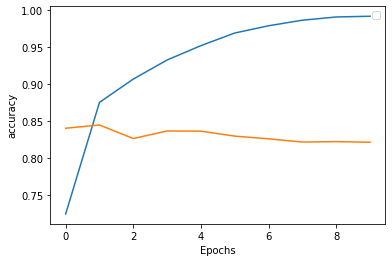

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
 

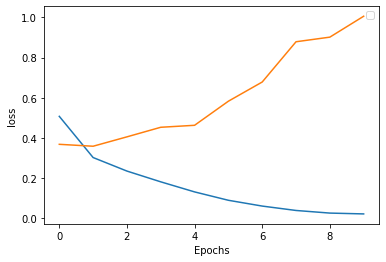

In [68]:
import matplotlib.pyplot as plt

def plot_graphs(history , string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend(string ,  'val_'+string)
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [69]:
model =  tf.keras.Sequential([tf.keras.layers.Embedding(input_dim= vocab_size ,  output_dim= embedding_dim , input_length= max_length  ),
                              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                              tf.keras.layers.Dense(6, activation='relu'),
                              tf.keras.layers.Dense(1 , activation='sigmoid')])

model.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [70]:
num_epochs = 10 
history =  model.fit(padded , train_labels_final ,  epochs= num_epochs ,  validation_data=  (testing_padded ,  test_labels_final ))

Epoch 1/10
782/782 [==============================] - 18s 23ms/step - loss: 0.4663 - accuracy: 0.7678 - val_loss: 0.3644 - val_accuracy: 0.8373
Epoch 2/10
782/782 [==============================] - 17s 22ms/step - loss: 0.2993 - accuracy: 0.8799 - val_loss: 0.3560 - val_accuracy: 0.8474
Epoch 3/10
782/782 [==============================] - 17s 22ms/step - loss: 0.2408 - accuracy: 0.9066 - val_loss: 0.4040 - val_accuracy: 0.8344
Epoch 4/10
782/782 [==============================] - 17s 22ms/step - loss: 0.1981 - accuracy: 0.9272 - val_loss: 0.4138 - val_accuracy: 0.8235
Epoch 5/10
782/782 [==============================] - 17s 22ms/step - loss: 0.1651 - accuracy: 0.9413 - val_loss: 0.4497 - val_accuracy: 0.8206
Epoch 6/10
782/782 [==============================] - 17s 22ms/step - loss: 0.1393 - accuracy: 0.9526 - val_loss: 0.5121 - val_accuracy: 0.8160
Epoch 7/10
782/782 [==============================] - 17s 22ms/step - loss: 0.1155 - accuracy: 0.9606 - val_loss: 0.5902 - val_accuracy:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The handle 'u' has a label of '_' which cannot be automatically added to the legend.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
 

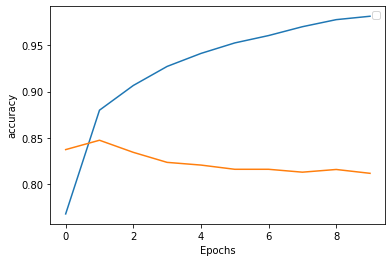

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
 

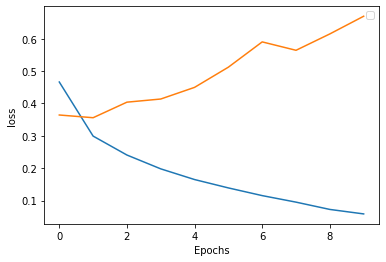

In [73]:

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [77]:
model =  tf.keras.Sequential([tf.keras.layers.Embedding(input_dim= vocab_size ,  output_dim= embedding_dim , input_length= max_length  ),
                              tf.keras.layers.Conv1D(128,5 ,activation='relu'),
                              tf.keras.layers.GlobalAveragePooling1D(),
                              tf.keras.layers.Dense(6, activation='relu'),
                              tf.keras.layers.Dense(1 , activation='sigmoid')])

model.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 774       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [78]:
num_epochs = 10 
history =  model.fit(padded , train_labels_final ,  epochs= num_epochs ,  validation_data=  (testing_padded ,  test_labels_final ))

Epoch 1/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4378 - accuracy: 0.7873 - val_loss: 0.3445 - val_accuracy: 0.8504
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2800 - accuracy: 0.8859 - val_loss: 0.3636 - val_accuracy: 0.8432
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2283 - accuracy: 0.9111 - val_loss: 0.3887 - val_accuracy: 0.8358
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1880 - accuracy: 0.9313 - val_loss: 0.4261 - val_accuracy: 0.8321
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1559 - accuracy: 0.9469 - val_loss: 0.4796 - val_accuracy: 0.8187
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1250 - accuracy: 0.9610 - val_loss: 0.5669 - val_accuracy: 0.8164
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1008 - accuracy: 0.9687 - val_loss: 0.6063 - val_accuracy: 0.8148
Epoch 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The handle 'u' has a label of '_' which cannot be automatically added to the legend.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
 

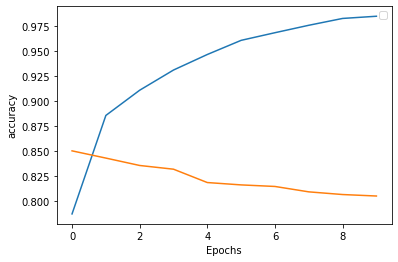

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
 

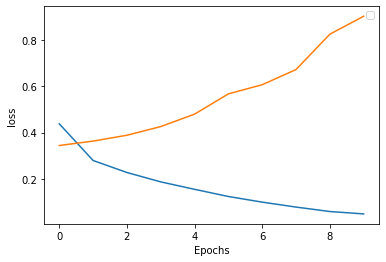

In [79]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')